## Analysis of a Livestock Data of Nepal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv("horseasses-population-in-nepal-by-district.csv")
data1.head()

,DISTRICT,Horses/Asses
0,TAPLEJUNG,543
1,SANKHUWASHAVA,358
2,SOLUKHUMBU,1775
3,PANCHTHAR,15
4,ILLAM,2815


In [3]:
data2 = pd.read_csv('milk-animals-and-milk-production-in-nepal-by-district.csv')
data3 = pd.read_csv('net-meat-production-in-nepal-by-district.csv')
data4 = pd.read_csv('production-of-cotton-in-nepal-by-district.csv')
data5 = pd.read_csv('production-of-egg-in-nepal-by-district.csv')
data6 = pd.read_csv('rabbit-population-in-nepal-by-district.csv')
data7 = pd.read_csv('wool-production-in-nepal-by-district.csv')
data8 = pd.read_csv('yak-nak-chauri-population-in-nepal-by-district.csv')

In [4]:
# Renaming data1 column Horses/Asses into HorsesAsses
data1.rename(columns={'Horses/Asses':'HorsesAsses'}, inplace = True) 

In [5]:
data1.tail()

,DISTRICT,HorsesAsses
55,DOTI,252
56,BAITADI,484
57,DADELDHURA,241
58,FW.REGION,3811
59,Total,55808


**Confirming that the total value given is not correct** 

In [6]:
# finds out the sum of values of HorsesAsses
total_horsesasses = data1.HorsesAsses.sum() 
total_horsesasses

167424

**Removing total because the actual total is not correct compared with the dataset.**

In [7]:
# dropping the total value from data1 for further analysis
data1.drop(labels=59, axis=0, inplace = True)
data1.tail()

,DISTRICT,HorsesAsses
54,ACHHAM,95
55,DOTI,252
56,BAITADI,484
57,DADELDHURA,241
58,FW.REGION,3811


**Function to find out the different district name in two dataframes**

In [8]:
def find_difference(list1, list2):
     # stores the differences
    list_difference = [] 
    for item in list1:
        if item not in list2:
            #appends the different values found
            list_difference.append(item)
    return list_difference

**Creating list of districts to use it in above function.**

In [9]:
# data converted in list to find out the list of districts
horse_district = list(data1.DISTRICT) 
milk_district = list(data2.DISTRICT)

**Using above function to find different value in both the list**

In [10]:
find_difference(horse_district, milk_district)

['TERATHUM', 'E.REGION', 'C.REGION', 'W.REGION', 'MW.REGION', 'FW.REGION']

**Transforming the value in both data1 and data2 to make it equal for merge** 

In [11]:
data2['DISTRICT'] = data2['DISTRICT'].replace(['TERHATHUM'],'TERATHUM')
data2['DISTRICT'] = data2['DISTRICT'].replace(['E. REGION'],'E.REGION')
data2['DISTRICT'] = data2['DISTRICT'].replace(['C. REGION'],'C.REGION')
data2['DISTRICT'] = data2['DISTRICT'].replace(['W. REGION'],'W.REGION')
data2['DISTRICT'] = data2['DISTRICT'].replace(['MW. REGION'],'MW.REGION')
data2['DISTRICT'] = data2['DISTRICT'].replace(['FW. REGION'],'FW.REGION')

**Merging data1 and data2**

In [12]:
# merges data1 and data2 and creates new dataframe data9
data9 = pd.merge(data1, data2, on="DISTRICT", how='outer')
data9

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0
...,...,...,...,...,...,...,...
91,FW.HILLS,NaN,45036,39569,22850,33505,56355.0
92,KAILALI,NaN,27758,41103,27905,36677,64582.0
93,KANCHANPUR,NaN,20164,27812,23146,25876,49022.0
94,FW.TERAI,NaN,47922,68915,51051,62553,113604.0


## Finding Difference between dataframe to merge

**Using find_difference function to find difference between two dataframes**

In [13]:
differ_data1 = list(data9['DISTRICT'])
differ_data2 = list(data3['DISTRICT'])
find_difference(differ_data1, differ_data2)

['SANKHUWASHAVA', 'TERATHUM']

**Renaming different district name to merge**

In [14]:
data3['DISTRICT'] = data3['DISTRICT'].replace(['TERHATHUM'],'TERATHUM')
data3['DISTRICT'] = data3['DISTRICT'].replace(['SANKHUWASABHA'],'SANKHUWASHAVA')

**Merging Data9 and Data3**

In [15]:
# merges data9 and data3 and creates new dataframe data10
data10 = pd.merge(data9, data3, on="DISTRICT", how='outer')
data10

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,509,302,1,3457
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,428,166,0,2161
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,730,248,1,3419
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,416,104,0,3365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,FW.HILLS,NaN,45036,39569,22850,33505,56355.0,5692,14,3103,87,237,0,9133
92,KAILALI,NaN,27758,41103,27905,36677,64582.0,5962,71,1480,469,1303,4,9289
93,KANCHANPUR,NaN,20164,27812,23146,25876,49022.0,3816,27,850,360,1085,2,6140
94,FW.TERAI,NaN,47922,68915,51051,62553,113604.0,9778,98,2330,829,2388,6,15429


**Using find_difference function to find difference between two dataframes**

In [16]:
differ_data3 = list(data10['DISTRICT'])
differ_data4 = list(data4['DISTRICT'])
find_difference(differ_data4, differ_data3)

['Dang', 'Banke', 'Bardiya']

**Renaming different district name to merge**

In [17]:
data4['DISTRICT'] = data4['DISTRICT'].replace(['Dang'],'DANG')
data4['DISTRICT'] = data4['DISTRICT'].replace(['Banke'],'BANKE')
data4['DISTRICT'] = data4['DISTRICT'].replace(['Bardiya'],'BARDIYA')

**Merging Data10 and Data4**

In [18]:
# merges data10 and data4 and creates new dataframe data11
data11 = pd.merge(data10, data4, on="DISTRICT", how='outer')
data11

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744,NaN,NaN,NaN
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,509,302,1,3457,NaN,NaN,NaN
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,428,166,0,2161,NaN,NaN,NaN
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,730,248,1,3419,NaN,NaN,NaN
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,416,104,0,3365,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,FW.HILLS,NaN,45036,39569,22850,33505,56355.0,5692,14,3103,87,237,0,9133,NaN,NaN,NaN
92,KAILALI,NaN,27758,41103,27905,36677,64582.0,5962,71,1480,469,1303,4,9289,NaN,NaN,NaN
93,KANCHANPUR,NaN,20164,27812,23146,25876,49022.0,3816,27,850,360,1085,2,6140,NaN,NaN,NaN
94,FW.TERAI,NaN,47922,68915,51051,62553,113604.0,9778,98,2330,829,2388,6,15429,NaN,NaN,NaN


**Using find_difference function to find difference between two dataframes**

In [19]:
differ_data5 = list(data11['DISTRICT'])
differ_data6 = list(data5['DISTRICT'])
find_difference(differ_data5, differ_data6)

['TERATHUM']

**Renaming different district name to merge**

In [20]:
data5['DISTRICT'] = data5['DISTRICT'].replace(['TERHATHUM'],'TERATHUM')

## Merging Data11 and Data5

In [21]:
# merges data11 and data5 and creates new dataframe data12
data12 = pd.merge(data11, data5, on="DISTRICT", how='outer')
data12

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,...,0,1744,NaN,NaN,NaN,15366.0,341,2420,25,2445
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,...,1,3457,NaN,NaN,NaN,77512.0,465,5506,34,5540
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,...,0,2161,NaN,NaN,NaN,42671.0,374,2345,28,2373
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,...,1,3419,NaN,NaN,NaN,63779.0,261,5581,19,5600
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,...,0,3365,NaN,NaN,NaN,26781.0,332,6656,27,6683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,FW.HILLS,NaN,45036,39569,22850,33505,56355.0,5692,14,3103,...,0,9133,NaN,NaN,NaN,48735.0,535,7717,39,7756
92,KAILALI,NaN,27758,41103,27905,36677,64582.0,5962,71,1480,...,4,9289,NaN,NaN,NaN,277409.3,3418,16928,275,17203
93,KANCHANPUR,NaN,20164,27812,23146,25876,49022.0,3816,27,850,...,2,6140,NaN,NaN,NaN,186108.0,1932,13483,155,13638
94,FW.TERAI,NaN,47922,68915,51051,62553,113604.0,9778,98,2330,...,6,15429,NaN,NaN,NaN,463517.8,5350,30411,430,30841


**Using find_difference function to find difference between two dataframes**

In [22]:
differ_data7 = list(data12['DISTRICT'])
differ_data8 = list(data6['DISTRICT'])
find_difference(differ_data8, differ_data7)

['TERHATHUM', 'RAMECHHAP', 'Total']

**Removing total because the actual total is not correct compared with the dataset.**

In [23]:
# dropping the total value from df1 for further analysis
data6.drop(labels=54, axis=0, inplace = True) 
data6.tail()

,DISTRICT,Rabbit
49,BAJURA,285
50,BAJHANG,148
51,DARCHULA,522
52,DOTI,432
53,FW.REGION,1387


**Using find_difference function to find difference between two dataframes**

In [24]:
differ_data7 = list(data12['DISTRICT'])
differ_data8 = list(data6['DISTRICT'])
find_difference(differ_data8, differ_data7)

['TERHATHUM', 'RAMECHHAP']

**Renaming different district name to merge**

In [25]:
data6['DISTRICT'] = data6['DISTRICT'].replace(['TERHATHUM'],'TERATHUM')
data6['DISTRICT'] = data6['DISTRICT'].replace(['RAMECHHAP'],'RAMECHAP')

## Merging Data12 and Data6

In [26]:
# merges data12 and data6 and creates new dataframe data13
data13 = pd.merge(data12, data6, on="DISTRICT", how='outer')
data13

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,...,1744,NaN,NaN,NaN,15366.0,341,2420,25,2445,506.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,...,3457,NaN,NaN,NaN,77512.0,465,5506,34,5540,313.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,...,2161,NaN,NaN,NaN,42671.0,374,2345,28,2373,105.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,...,3419,NaN,NaN,NaN,63779.0,261,5581,19,5600,29.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,...,3365,NaN,NaN,NaN,26781.0,332,6656,27,6683,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,FW.HILLS,NaN,45036,39569,22850,33505,56355.0,5692,14,3103,...,9133,NaN,NaN,NaN,48735.0,535,7717,39,7756,NaN
92,KAILALI,NaN,27758,41103,27905,36677,64582.0,5962,71,1480,...,9289,NaN,NaN,NaN,277409.3,3418,16928,275,17203,NaN
93,KANCHANPUR,NaN,20164,27812,23146,25876,49022.0,3816,27,850,...,6140,NaN,NaN,NaN,186108.0,1932,13483,155,13638,NaN
94,FW.TERAI,NaN,47922,68915,51051,62553,113604.0,9778,98,2330,...,15429,NaN,NaN,NaN,463517.8,5350,30411,430,30841,NaN


**Using find_difference function to find difference between two dataframes**

In [27]:
differ_data9 = list(data13['DISTRICT'])
differ_data10 = list(data7['DISTRICT'])
find_difference(differ_data10, differ_data9)

['TERHATHUM']

**Renaming different district name to merge**

In [28]:
data7['DISTRICT'] = data7['DISTRICT'].replace(['TERHATHUM'],'TERATHUM')

## Merging Data13 and Data7

In [29]:
# merges data13 and data7 and creates new dataframe data14
data14 = pd.merge(data13, data7, on="DISTRICT", how='outer')
data14

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,...,NaN,NaN,15366.0,341,2420,25,2445,506.0,5777,3519
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,...,NaN,NaN,77512.0,465,5506,34,5540,313.0,12181,9050
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,...,NaN,NaN,42671.0,374,2345,28,2373,105.0,8461,6286
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,...,NaN,NaN,63779.0,261,5581,19,5600,29.0,1338,994
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,...,NaN,NaN,26781.0,332,6656,27,6683,240.0,160,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,FW.HILLS,NaN,45036,39569,22850,33505,56355.0,5692,14,3103,...,NaN,NaN,48735.0,535,7717,39,7756,NaN,4366,3350
92,KAILALI,NaN,27758,41103,27905,36677,64582.0,5962,71,1480,...,NaN,NaN,277409.3,3418,16928,275,17203,NaN,21267,15801
93,KANCHANPUR,NaN,20164,27812,23146,25876,49022.0,3816,27,850,...,NaN,NaN,186108.0,1932,13483,155,13638,NaN,7953,5909
94,FW.TERAI,NaN,47922,68915,51051,62553,113604.0,9778,98,2330,...,NaN,NaN,463517.8,5350,30411,430,30841,NaN,29220,21710


**Using find_difference function to find difference between two dataframes**

In [30]:
differ_data11 = list(data14['DISTRICT'])
differ_data12 = list(data8['DISTRICT'])
find_difference(differ_data12, differ_data11)

['Total']

**Removing total because the actual total is not correct compared with the dataset.**

In [31]:
# dropping the total value from data8 for further analysis
data8.drop(labels=34, axis=0, inplace = True)
data8.tail()

,DISTRICT,YAK/NAK/CHAURI
29,MW.REGION,17835
30,BAJURA,89
31,BAJHANG,381
32,DARCHULA,422
33,FW.REGION,892


**Using find_difference function to find difference between two dataframes**

In [32]:
differ_data11 = list(data14['DISTRICT'])
differ_data12 = list(data8['DISTRICT'])
find_difference(differ_data12, differ_data11)

[]

## Merging Data14 and Data8 which will create final Dataframe

In [33]:
# merges data14 and data8 and creates new dataframe data15
data15 = pd.merge(data14, data8, on="DISTRICT", how='outer')
data15

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,...,YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,...,NaN,15366.0,341,2420,25,2445,506.0,5777,3519,3465.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,...,NaN,77512.0,465,5506,34,5540,313.0,12181,9050,3945.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,...,NaN,42671.0,374,2345,28,2373,105.0,8461,6286,12235.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,...,NaN,63779.0,261,5581,19,5600,29.0,1338,994,1075.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,...,NaN,26781.0,332,6656,27,6683,240.0,160,118,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,FW.HILLS,NaN,45036,39569,22850,33505,56355.0,5692,14,3103,...,NaN,48735.0,535,7717,39,7756,NaN,4366,3350,NaN
92,KAILALI,NaN,27758,41103,27905,36677,64582.0,5962,71,1480,...,NaN,277409.3,3418,16928,275,17203,NaN,21267,15801,NaN
93,KANCHANPUR,NaN,20164,27812,23146,25876,49022.0,3816,27,850,...,NaN,186108.0,1932,13483,155,13638,NaN,7953,5909,NaN
94,FW.TERAI,NaN,47922,68915,51051,62553,113604.0,9778,98,2330,...,NaN,463517.8,5350,30411,430,30841,NaN,29220,21710,NaN


In [34]:
pd.set_option('display.max_columns', None)
data15

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744,NaN,NaN,NaN,15366.0,341,2420,25,2445,506.0,5777,3519,3465.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,509,302,1,3457,NaN,NaN,NaN,77512.0,465,5506,34,5540,313.0,12181,9050,3945.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,428,166,0,2161,NaN,NaN,NaN,42671.0,374,2345,28,2373,105.0,8461,6286,12235.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,730,248,1,3419,NaN,NaN,NaN,63779.0,261,5581,19,5600,29.0,1338,994,1075.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,416,104,0,3365,NaN,NaN,NaN,26781.0,332,6656,27,6683,240.0,160,118,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,FW.HILLS,NaN,45036,39569,22850,33505,56355.0,5692,14,3103,87,237,0,9133,NaN,NaN,NaN,48735.0,535,7717,39,7756,NaN,4366,3350,NaN
92,KAILALI,NaN,27758,41103,27905,36677,64582.0,5962,71,1480,469,1303,4,9289,NaN,NaN,NaN,277409.3,3418,16928,275,17203,NaN,21267,15801,NaN
93,KANCHANPUR,NaN,20164,27812,23146,25876,49022.0,3816,27,850,360,1085,2,6140,NaN,NaN,NaN,186108.0,1932,13483,155,13638,NaN,7953,5909,NaN
94,FW.TERAI,NaN,47922,68915,51051,62553,113604.0,9778,98,2330,829,2388,6,15429,NaN,NaN,NaN,463517.8,5350,30411,430,30841,NaN,29220,21710,NaN


In [35]:
pd.set_option("max_rows", None)
data15

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
0,TAPLEJUNG,543.0,8123,4987,5389,4257,9645.0,607,31,491,443,172,0,1744,NaN,NaN,NaN,15366.00,341,2420,25,2445,506.0,5777,3519,3465.0
1,SANKHUWASHAVA,358.0,15342,13367,6988,10589,17577.0,1646,41,958,509,302,1,3457,NaN,NaN,NaN,77512.00,465,5506,34,5540,313.0,12181,9050,3945.0
2,SOLUKHUMBU,1775.0,7819,13501,2948,5493,8441.0,1123,28,416,428,166,0,2161,NaN,NaN,NaN,42671.00,374,2345,28,2373,105.0,8461,6286,12235.0
3,PANCHTHAR,15.0,14854,11331,8511,9835,18346.0,1496,4,940,730,248,1,3419,NaN,NaN,NaN,63779.00,261,5581,19,5600,29.0,1338,994,1075.0
4,ILLAM,2815.0,26821,5759,19735,15261,34996.0,1974,1,870,416,104,0,3365,NaN,NaN,NaN,26781.00,332,6656,27,6683,240.0,160,118,165.0
5,TERATHUM,42.0,18880,13276,10089,11500,21589.0,2358,24,399,486,116,1,3384,NaN,NaN,NaN,26030.00,514,3000,39,3039,206.0,7083,5262,NaN
6,BHOJPUR,168.0,14103,16342,7324,14184,21508.0,1251,51,313,919,251,2,2787,NaN,NaN,NaN,53957.00,1136,4037,88,4125,42.0,18210,13530,887.0
7,KHOTANG,350.0,12998,19501,7105,12275,19380.0,1997,31,442,705,310,1,3486,NaN,NaN,NaN,50271.00,354,4310,27,4337,100.0,9156,5925,350.0
8,OKHALDHUNGA,102.0,7930,11693,4555,5516,10071.0,1497,31,685,751,294,0,3258,NaN,NaN,NaN,59344.00,445,3296,33,3329,645.0,9105,6756,675.0
9,UDAYAPUR,1302.0,15867,26138,9092,22687,31779.0,3346,2,1430,818,578,2,6176,NaN,NaN,NaN,148326.00,1474,50120,116,50236,1217.0,609,452,NaN


# Further Analysis

# HorsesAsses Population Analysis 

In [36]:
datahorse= data15[data15['DISTRICT'].str.endswith(("REGION"))]
datahorse

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,10195,8811,89,76313,NaN,NaN,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,4432,28728,67,100620,NaN,NaN,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,4127,9414,65,67183,NaN,NaN,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,3770,5354,10,48836,NaN,NaN,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,985,2734,6,29107,NaN,NaN,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0


Text(0.5, 0, 'Development Region')

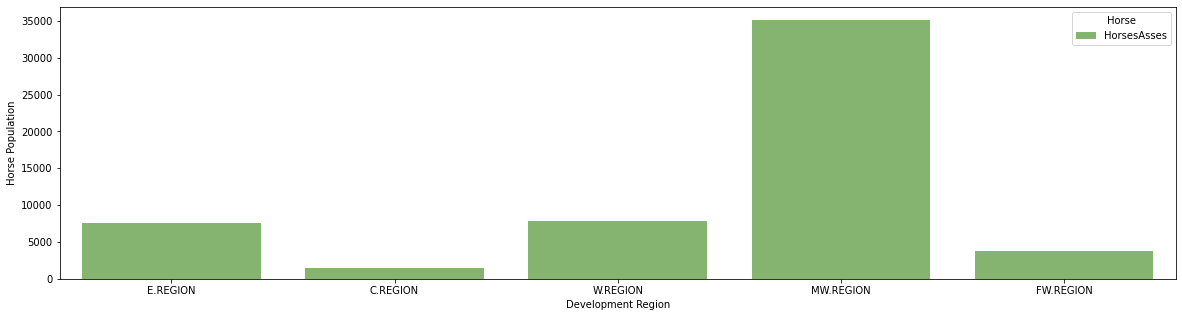

In [37]:
#Total horse population in five development region in Nepal
horse_population = datahorse[['DISTRICT','HorsesAsses']]
#Reshaping
horse_reshape= pd.melt(horse_population, id_vars="DISTRICT",value_name="Horse Population",var_name="Horse")
plt.figure(figsize=(20,5))
#pointplot to visualize the data
sns.barplot(x="DISTRICT", y="Horse Population", data= horse_reshape, hue="Horse", palette="summer")
plt.xlabel('Development Region')

The bar graph above represents the population of horses in Nepal's five development regions. The population of horsesasses is larger in the Mid-Western Region (over 35000) and lower in the Center Region (less than 5000), as seen in the bar graph above. In the Eastern and Western Regions, the population of horsesasses ranges from 5000 to 10,000. In the Far-Western Region, there are nearly 5000 horsesasses.

# Milk Production Analysis

In [38]:
milkdata = data15.set_index("DISTRICT", drop = False)

<AxesSubplot:xlabel='DISTRICT'>

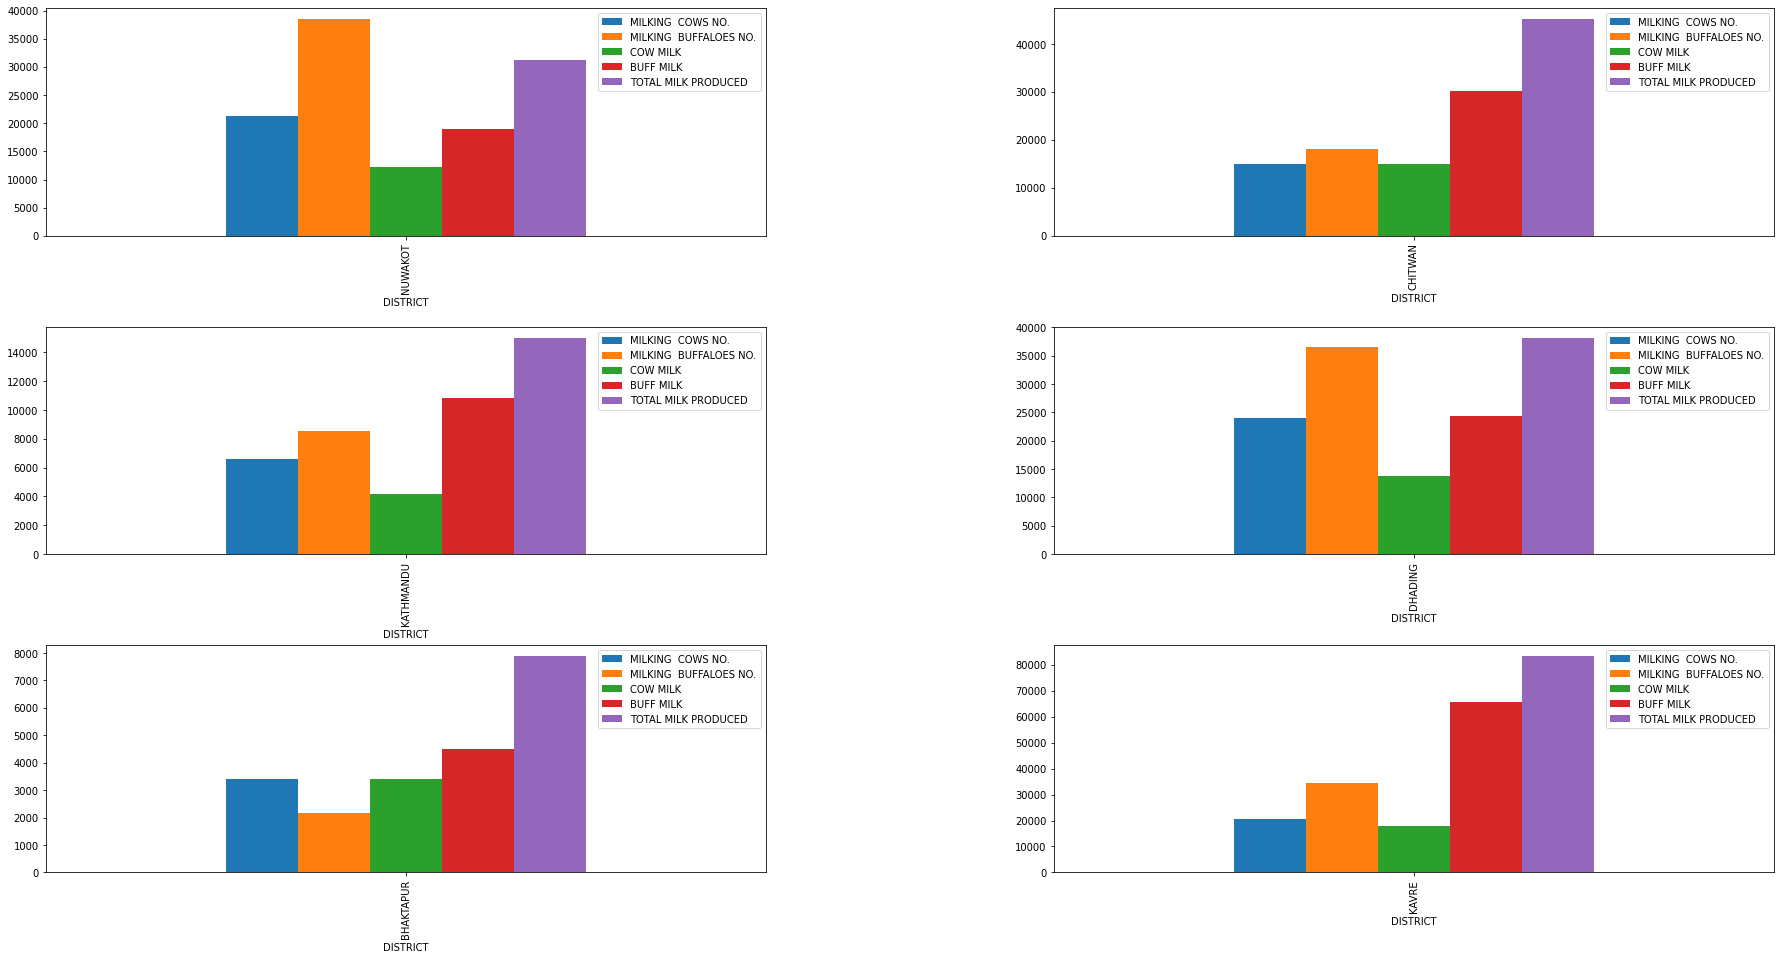

In [39]:
#Bar plot to visualize the milk production in different area of central devlopment region
size=(30,15)
f, axes = plt.subplots(3,2)
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
milkdata.iloc[14:15,2:7].plot.bar(figsize = size,ax=axes[0][0])
milkdata.iloc[17:18,2:7].plot.bar(figsize = size, ax=axes[0][1])
milkdata.iloc[74:75,2:7].plot.bar(figsize = size, ax=axes[1][0])
milkdata.iloc[75:76,2:7].plot.bar(figsize = size, ax=axes[1][1])
milkdata.iloc[72:73,2:7].plot.bar(figsize = size, ax=axes[2][0])
milkdata.iloc[71:72,2:7].plot.bar(figsize = size, ax=axes[2][1])

The following bar graph represents milk production in six areas of Nepal's Center Development Region: Nuwakot, Chitwan, Kathmandu, Dhading, Bhaktapur, and Kavre. From these six areas, Kavre produces more milk in both cow and buff milk, as well as total milk production, whereas Bhaktapur produces less milk in both cow and milk, as well as total milk production.

# Analysis of Meat Production

In [40]:
datameat= data15[data15['DISTRICT'].str.endswith(("REGION"))]
datameat

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,10195,8811,89,76313,NaN,NaN,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,4432,28728,67,100620,NaN,NaN,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,4127,9414,65,67183,NaN,NaN,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,3770,5354,10,48836,NaN,NaN,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,985,2734,6,29107,NaN,NaN,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0


Text(0.5, 0, 'Development Region')

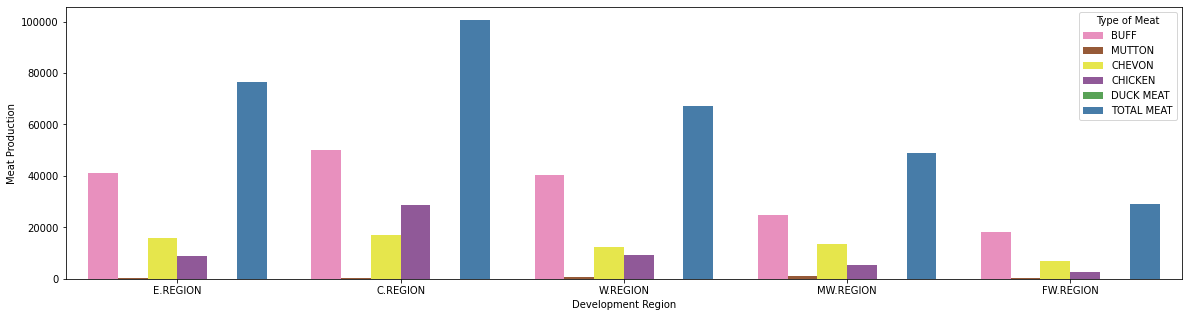

In [41]:
#Total meat production in different Development Region in Nepal
meat_production = datameat[['DISTRICT','BUFF','MUTTON','CHEVON','CHICKEN','DUCK MEAT','TOTAL MEAT']]
#Reshaping
meat_reshape= pd.melt(meat_production, id_vars="DISTRICT",value_name="Meat Production",var_name="Type of Meat")
plt.figure(figsize=(20,5))
#barplot to visualize the data
sns.barplot(x="DISTRICT", y="Meat Production", data= meat_reshape, hue="Type of Meat", palette="Set1_r" )
plt.xlabel('Development Region')

The meat production in Nepal's five development regions is shown in the bar graph above. As shown in the bar graph above, meat production is highest in the Center Region (about 100000) and lowest in the Far-Western Region (less than 50000). Meat production in the Eastern and Western Regions ranges from 60000 to 80,000 tons. There are nearly 60000 meat producers in the Mid-Western Region.

#  Wool Production Analysis 

In [42]:
datasheep= data15[data15['DISTRICT'].str.endswith(("REGION"))]
datasheep

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,10195,8811,89,76313,NaN,NaN,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,4432,28728,67,100620,NaN,NaN,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,4127,9414,65,67183,NaN,NaN,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,3770,5354,10,48836,NaN,NaN,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,985,2734,6,29107,NaN,NaN,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0


Text(0.5, 0, 'Development Region')

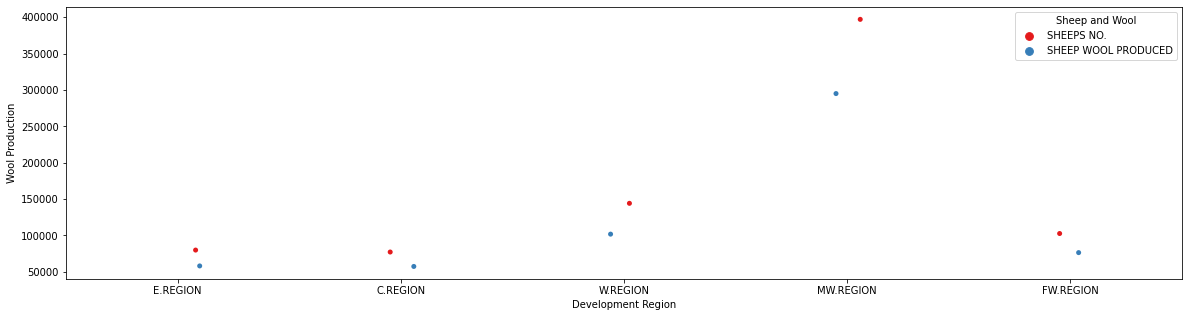

In [43]:
#Total wool production in different region in Nepal
wool_production = datasheep[['DISTRICT','SHEEPS NO.','SHEEP WOOL PRODUCED']]
#Reshaping
wool_reshape= pd.melt(wool_production, id_vars="DISTRICT",value_name="Wool Production",var_name="Sheep and Wool")
plt.figure(figsize=(20,5))
#strip plot to visualize the data
sns.stripplot(x="DISTRICT", y="Wool Production", data= wool_reshape, hue="Sheep and Wool", palette="Set1")
plt.xlabel('Development Region')

The strip plot above illustrates the Wool production in Nepal's five development areas. Wool production is highest in the Mid-Western Region Center Region (approximately 300000) and lowest in the Eastern Region, Center Region, and Far-Western Region, as illustrated in the strip plot above (around 50000). The Western Region produces roughly 100,000 cotton production. 

# Yak Population Analysis

In [44]:
datayak= data15[data15['DISTRICT'].str.endswith(("REGION"))]
datayak

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,10195,8811,89,76313,NaN,NaN,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,4432,28728,67,100620,NaN,NaN,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,4127,9414,65,67183,NaN,NaN,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,3770,5354,10,48836,NaN,NaN,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,985,2734,6,29107,NaN,NaN,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0


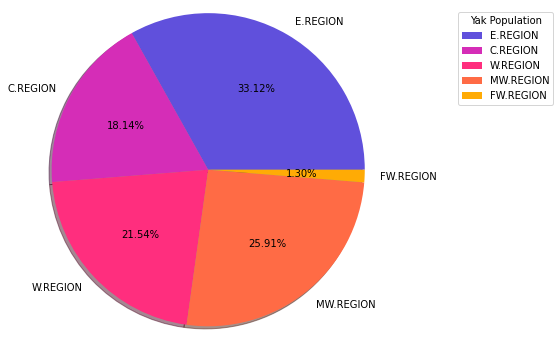

In [45]:
pie, ax = plt.subplots(figsize=[6,6])
plt.pie(datayak['YAK/NAK/CHAURI'],
        labels = datayak['DISTRICT'],
        colors = ["#6050DC", "#D52DB7","#FF2E7E","#FF6B45","#FFAB05"], autopct = "%.2f%%",radius = 1.2,shadow=True)
ax.legend(title="Yak Population",bbox_to_anchor =(1.25,1))

The pie plot above represents the population of yak in Nepal's five development regions. The population of yak is larger in the Eastern Region i.e., 33.12% and lower in the Far-Western Region i.e., 1.30% as seen in the pie plot above. In the Mid-Western and Western Regions, the population of yak is 25.81% and 21.545 respectively. In the Center Region, there are 18.14% yak population.

# Cotton Production Analysis

In [46]:
cotton_production= data15[data15['DISTRICT'].str.startswith(("DANG","BANKE","BARDIYA"))]
cotton_production

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
47,DANG,317.0,18630,31882,9984,18043,28027.0,3507,115,3352,679,1604,4,9261,106.0,74.0,700.0,411349.0,3223,54787,260,55047,NaN,34091,25329,NaN
48,BANKE,3963.0,14060,36201,8956,31062,40018.0,3256,42,1652,620,785,1,6356,27.0,41.0,1519.0,194508.0,858,13063,65,13128,NaN,11609,8625,NaN
49,BARDIYA,559.0,15932,27931,10792,27784,38576.0,3405,35,1758,610,474,1,6283,10.0,12.0,1200.0,123536.0,1214,15457,92,15549,NaN,13025,9677,NaN


Text(0.5, 0, 'Distict')

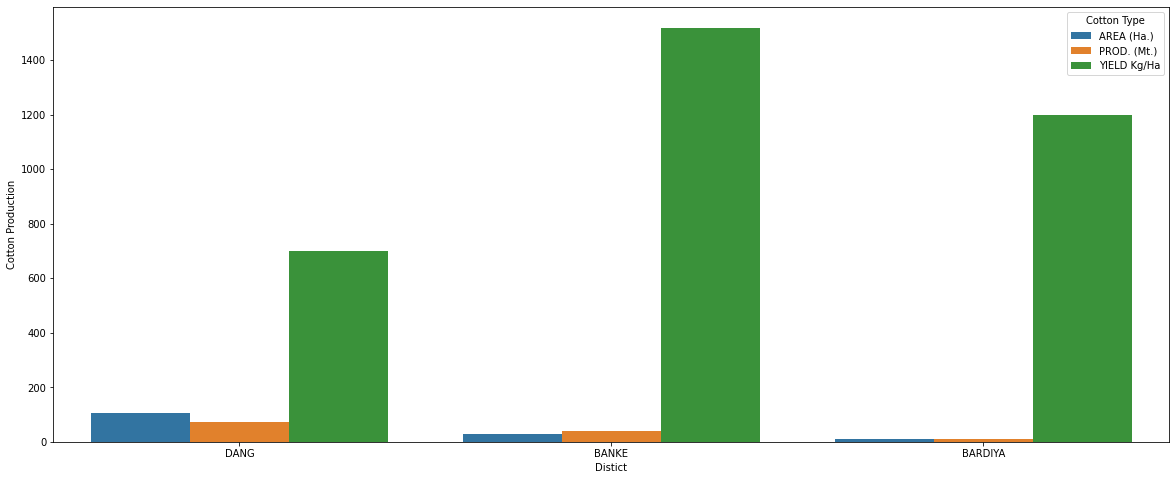

In [47]:
cotton_production= cotton_production[['DISTRICT','AREA (Ha.)','PROD. (Mt.)','YIELD Kg/Ha']]
#Reshaping
cotton_reshape = pd.melt(cotton_production, id_vars='DISTRICT',var_name='Cotton Type',value_name='Cotton Production')
#plot the data in barplot
plt.figure(figsize=(20,8))
sns.barplot(x= "DISTRICT", y= "Cotton Production", data=cotton_reshape, hue="Cotton Type" )
plt.xlabel('Distict')

The bar plot above represents cotton production in three districts, as only three districts grow cotton according to the data. Dang district has a wide producing area and produces great quantities but low yields. Similarly, the Bardiya district had a small producing area and a small but remarkable yield. And the Banke district offers a wide variety of yields when comparing producing area and output.

# Egg Production Analysis

In [48]:
dataegg= data15[data15['DISTRICT'].str.endswith(("REGION"))]
dataegg

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,10195,8811,89,76313,NaN,NaN,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,4432,28728,67,100620,NaN,NaN,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,4127,9414,65,67183,NaN,NaN,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,3770,5354,10,48836,NaN,NaN,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,985,2734,6,29107,NaN,NaN,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0


Text(0.5, 0, 'Development Region')

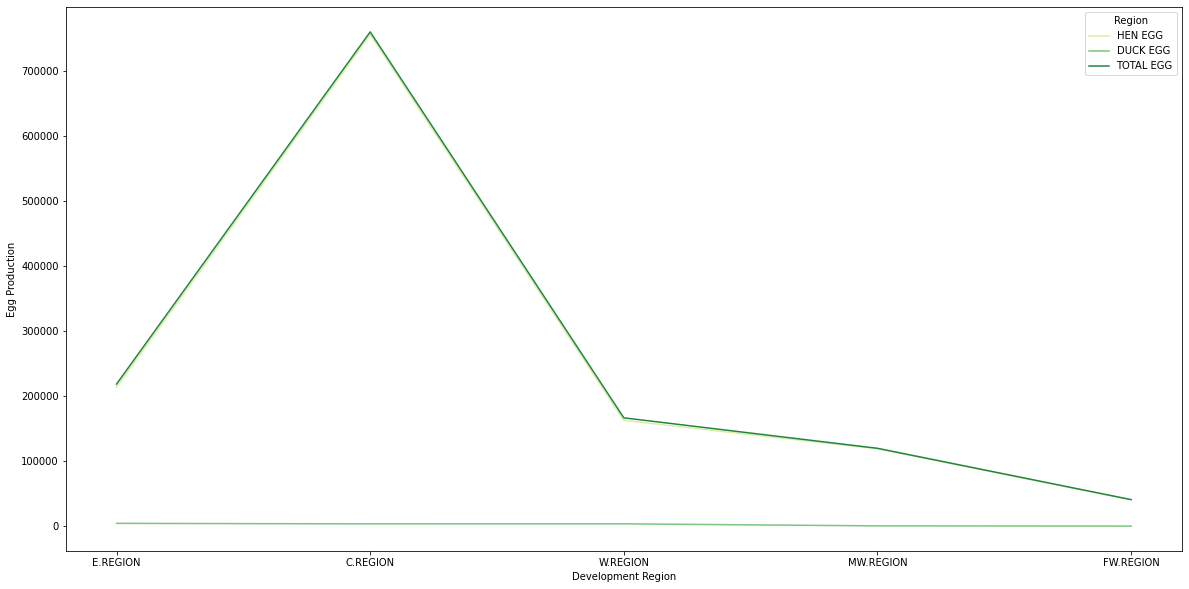

In [49]:
#Total egg production in different region in Nepal
egg_production = dataegg[['DISTRICT', 'HEN EGG', 'DUCK EGG', 'TOTAL EGG']]
#Reshaping
egg_reshape= pd.melt(egg_production, id_vars="DISTRICT",value_name="Egg Production",var_name="Region")
plt.figure(figsize=(20,10))
#lineplot to visualize the data
sns.lineplot(x="DISTRICT", y="Egg Production", data= egg_reshape, hue="Region", palette="YlGn")
plt.xlabel('Development Region')

The line plot above shows egg production in Nepal's five development areas. Egg production is highest in the Center Region (around 700000) and lowest in the Far-Western Region, as seen in the graph above (less than 100000). In the Western and Mid-Western regions, egg production ranges from 100000 to 200000. In the Eastern Region, there are over 200000 egg producers.

# Rabbit Population Analysis

In [50]:
datarabbit= data15[data15['DISTRICT'].str.endswith(("REGION"))]
datarabbit

,DISTRICT,HorsesAsses,MILKING COWS NO.,MILKING BUFFALOES NO.,COW MILK,BUFF MILK,TOTAL MILK PRODUCED,BUFF,MUTTON,CHEVON,PORK,CHICKEN,DUCK MEAT,TOTAL MEAT,AREA (Ha.),PROD. (Mt.),YIELD Kg/Ha,LAYING HEN,LAYING DUCK,HEN EGG,DUCK EGG,TOTAL EGG,Rabbit,SHEEPS NO.,SHEEP WOOL PRODUCED,YAK/NAK/CHAURI
13,E.REGION,7616.0,332384,292178,196708,263199,459907.0,41220,269,15729,10195,8811,89,76313,NaN,NaN,NaN,1780554.06,60193,214241,4712,218953,5124.0,79815,58002,22797.0
18,C.REGION,1468.0,263728,377741,177815,358483,536299.0,50244,256,16893,4432,28728,67,100620,NaN,NaN,NaN,7118554.32,49572,756783,3907,760690,5304.0,77126,57295,12484.0
34,W.REGION,7789.0,154560,341323,105190,315616,420806.0,40476,561,12540,4127,9414,65,67183,NaN,NaN,NaN,1745955.36,54256,163058,3963,167021,8915.0,144089,101731,14823.0
50,MW.REGION,35124.0,144868,211885,76157,160705,236862.0,24911,1263,13528,3770,5354,10,48836,NaN,NaN,NaN,1170714.06,10534,119341,820,120161,11483.0,397057,295006,17835.0
58,FW.REGION,3811.0,130595,132257,87936,112438,200374.0,18154,335,6893,985,2734,6,29107,NaN,NaN,NaN,537737.00,6372,40743,504,41247,1387.0,102571,76314,892.0


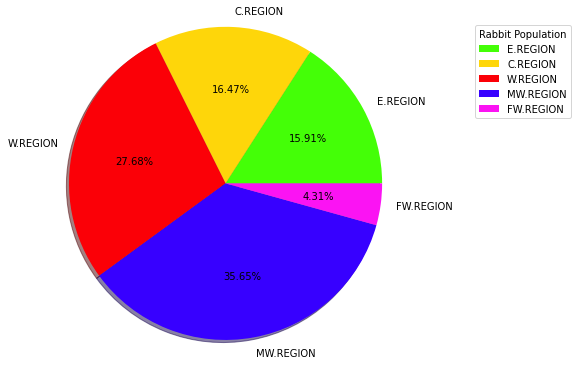

In [51]:
pie, ax = plt.subplots(figsize=[6,6])
plt.pie(datarabbit['Rabbit'],
        labels = datarabbit['DISTRICT'],
        colors = ["#44FF07", "#FED60A","#FB0007","#3700FF","#FB13F3"], autopct = "%.2f%%",radius = 1.2,shadow=True)
ax.legend(title="Rabbit Population",bbox_to_anchor =(1.25,1))

The pie plot above represents the population of rabbit in Nepal's five development regions. The population of rabbit is larger in the Mid-Western Region i.e., 35.65% and lower in the Far-Western Region i.e., 4.31% as seen in the pie plot above. In the Western and Centre Regions, the population of rabbit is 27.68% and 16.47 respectively. In the Eastern Region, there are 15.91% rabbit population.

# Analysis of Total Milk production,Total Milk, Total Meat,Sheep Wool Produced

In [52]:
#correlation between the different production items
correlation = data15[['TOTAL MILK PRODUCED','TOTAL EGG','SHEEP WOOL PRODUCED','TOTAL MEAT']].corr()
correlation

,TOTAL MILK PRODUCED,TOTAL EGG,SHEEP WOOL PRODUCED,TOTAL MEAT
TOTAL MILK PRODUCED,1.000000,0.750338,0.455700,0.988363
TOTAL EGG,0.750338,1.000000,0.722551,0.925947
SHEEP WOOL PRODUCED,0.455700,0.722551,1.000000,0.864765
TOTAL MEAT,0.988363,0.925947,0.864765,1.000000


Text(0.5, 1.0, 'Heatmap- Production of Different Items in Different District')

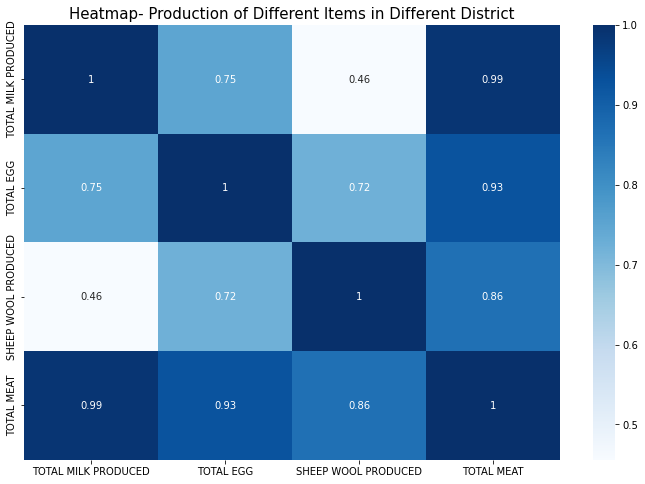

In [53]:
plt.figure(figsize=(12,8))
#plot the heatmap
sns.heatmap(correlation, annot = True, cmap = "Blues")
plt.title('Heatmap- Production of Different Items in Different District',fontsize=15)

The color codes used in the heatmap above show the strength of each variable, namely total milk produced, total egg, sheep wool produced, and total meat. In the above heatmap, the correlation between the variables is strong if the color is dark, but the connection between the variables is weak if the color is light.